# Let's start journey in to Machine Learning with Linear Regression


**This is very important data set for beginners who are starting journey in to Machine Learning field.**

* We will start from  very first regression algorithm 'Linear Regression' from scratch.
* Before applying Linear Regression we need to check for it's assumptions !!
* We will check if all the Linear Regression assumptions are satisfied on the given data set.
* If not satisfied then how to apply different techniques to make all the Linear regression assumption satisfied.

**Steps we are going to Follow:**

1. Data Reading : Collect the data from input data set
2. Explore the data
3. Assumption of Linear Regression
4. Apply different techniques to make data satisfy assumptions.


# Assumptions of Linear Regression

1. Linear relationship between each independent variable and the dependent variable
2. No or little Multicollinearity - No or Little Linearity between Predictors 
3. Homoscedasticity ( Constant Error Variance )
4. Independence of Errors ( vs Autocorrelation )
5. Multivariate Normality ( Normality of Errors )

In [1]:
# Importing all library to use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

# **Let's start the fun**

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input/house-prices-advanced-regression-techniques"]).decode("utf8")) #check the files available in the directory

data_description.txt
sample_submission.csv
test.csv
train.csv



# Load the data

In [3]:
# Reading data from file to proes the s
# file is at same location where we have this python code sheet
# Using panda lib to read file
trainData = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
trainData.shape

(1460, 81)

testData = pd.read_csv("/Users/ajaychauhan/Rajnish-GIThub-Repo/ML_Share_Doc-master/Code/LinearRegression/LR_Practice/HousePricingData/test.csv")
testData.shape

In [4]:
# Informtion about dataset 
# Number of colums
# how many rows dataset have
# how mnay not-null value each column have
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# first five rows to view
# change value from 5 to any number to view more data
trainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Provide statistics information about quantitative data
# 
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Assumptions of Linear Regression

1. Linear relationship between each independent variable and the dependent variable
2. No or little Multicollinearity - No or Little Linearity between Predictors 
3. Homoscedasticity ( Constant Error Variance )
4. Independence of Errors ( vs Autocorrelation )
5. Multivariate Normality ( Normality of Errors )

**Lets Check one by one if all the assumptions are satisfied**


# Let's check Linear Relationship First 
** High CoRelation between Target and Predictors**
All the features which are highly co-related should be considered in Linear Regression and rest of all should be discarded

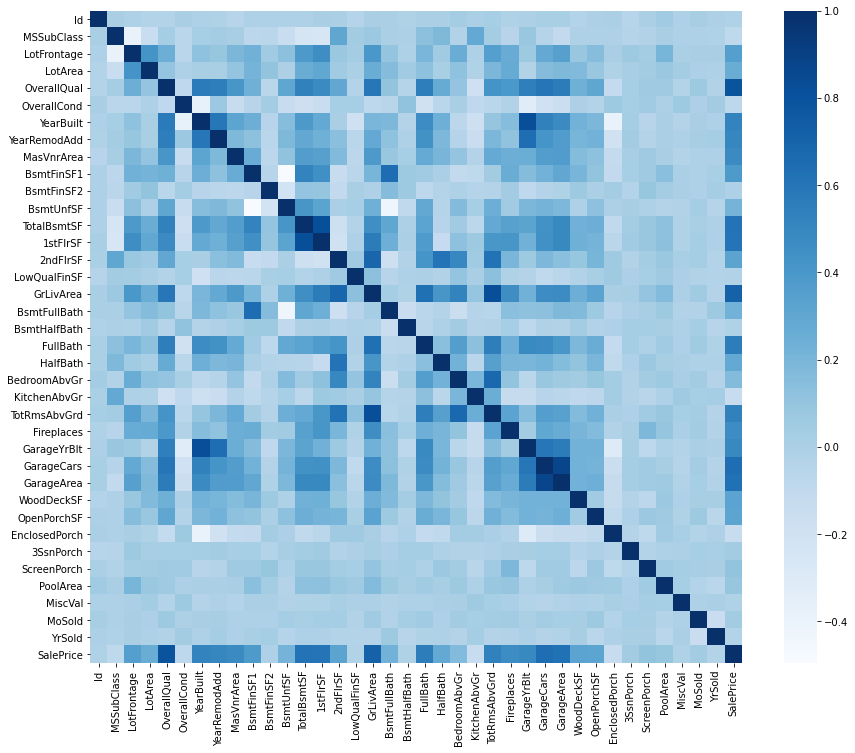

In [7]:
#correlation matrix for all Important Features
import seaborn as sns
corrmat = trainData.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap="Blues", square=True);

In [8]:
## Getting the correlation of all the features with target variable. 
(trainData.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

TOP 10 important features
1. OverallQual      0.625652
1. GrLivArea        0.502149
1. GarageCars       0.410124
1. GarageArea       0.388667
1. TotalBsmtSF      0.376481
1. 1stFlrSF         0.367057
1. FullBath         0.314344
1. TotRmsAbvGrd     0.284860
1. YearBuilt        0.273422
1. YearRemodAdd     0.257151

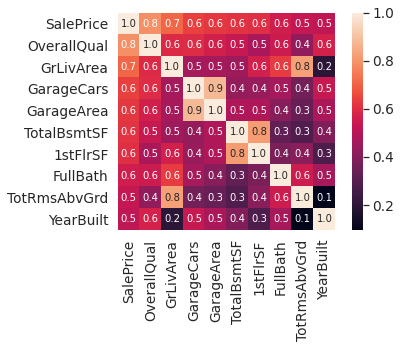

In [9]:
# correlation matrix for 10 important features
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainData[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Lets Visulaize all important features one by one

**SalePrice vs OverallQual**

OverallQual is a categorical variable, and a scatter plot is not the best way to visualize categorical variables. However, there is an apparent relationship between the two features. The price of the houses increases with the overall quality.


In [10]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    plt.style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

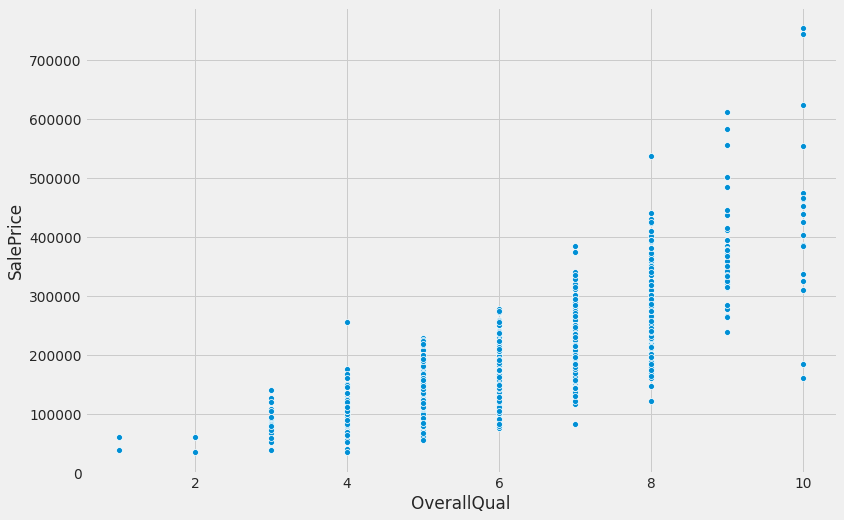

In [11]:
customized_scatterplot(trainData.SalePrice, trainData.OverallQual)

* In Above graph we can see that as Overall Qual is increasing Price is also increasing.
* Means we have linear relationship betwenn bothe variables

# SalePrice vs GrLivArea
* There we can see linear relationship
* Also As you can see, there are two outliers in the plot below.

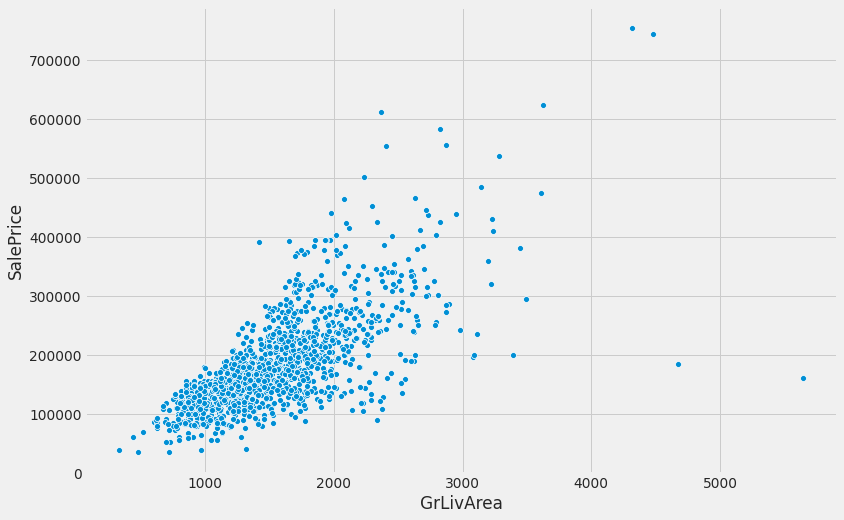

In [12]:

customized_scatterplot(trainData.SalePrice, trainData.GrLivArea)

Here we can see that there are few outliers for GrLivArea apprx. values > 4500---> Lets check them out

In [13]:
trainData[trainData.GrLivArea>=4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


> SalePrice vs GarageArea
* There we can see linear relationship
* Also As you can see, there are four outliers in the plot below for garage area > 1200

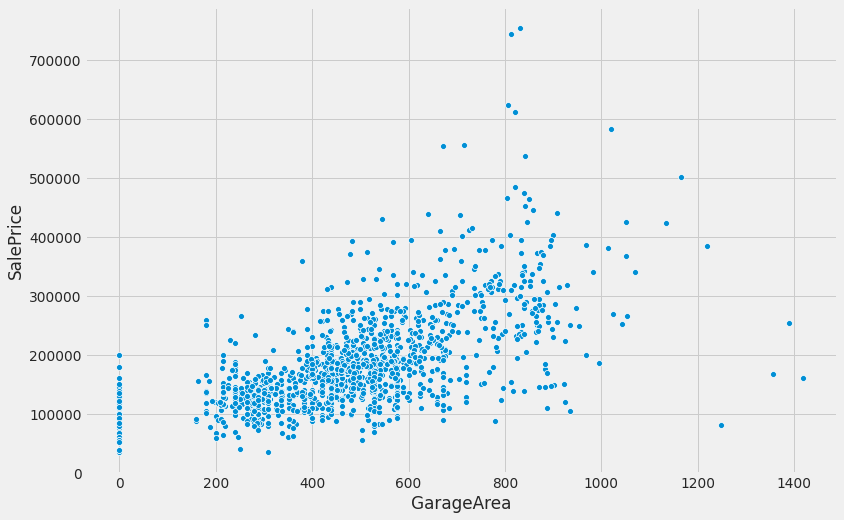

In [14]:
customized_scatterplot(trainData.SalePrice, trainData.GarageArea);

In [15]:
trainData[trainData.GarageArea>=1200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


**Scatter plots between 'SalePrice' and all highly correlated features**

* Below we can see that for all the highly corelated features there is high linear realtionship i.e 
* One is increating other is decreasing :- Postive Corelation
* Or one is increasing another is aslo increasing :- Negative Corealtion

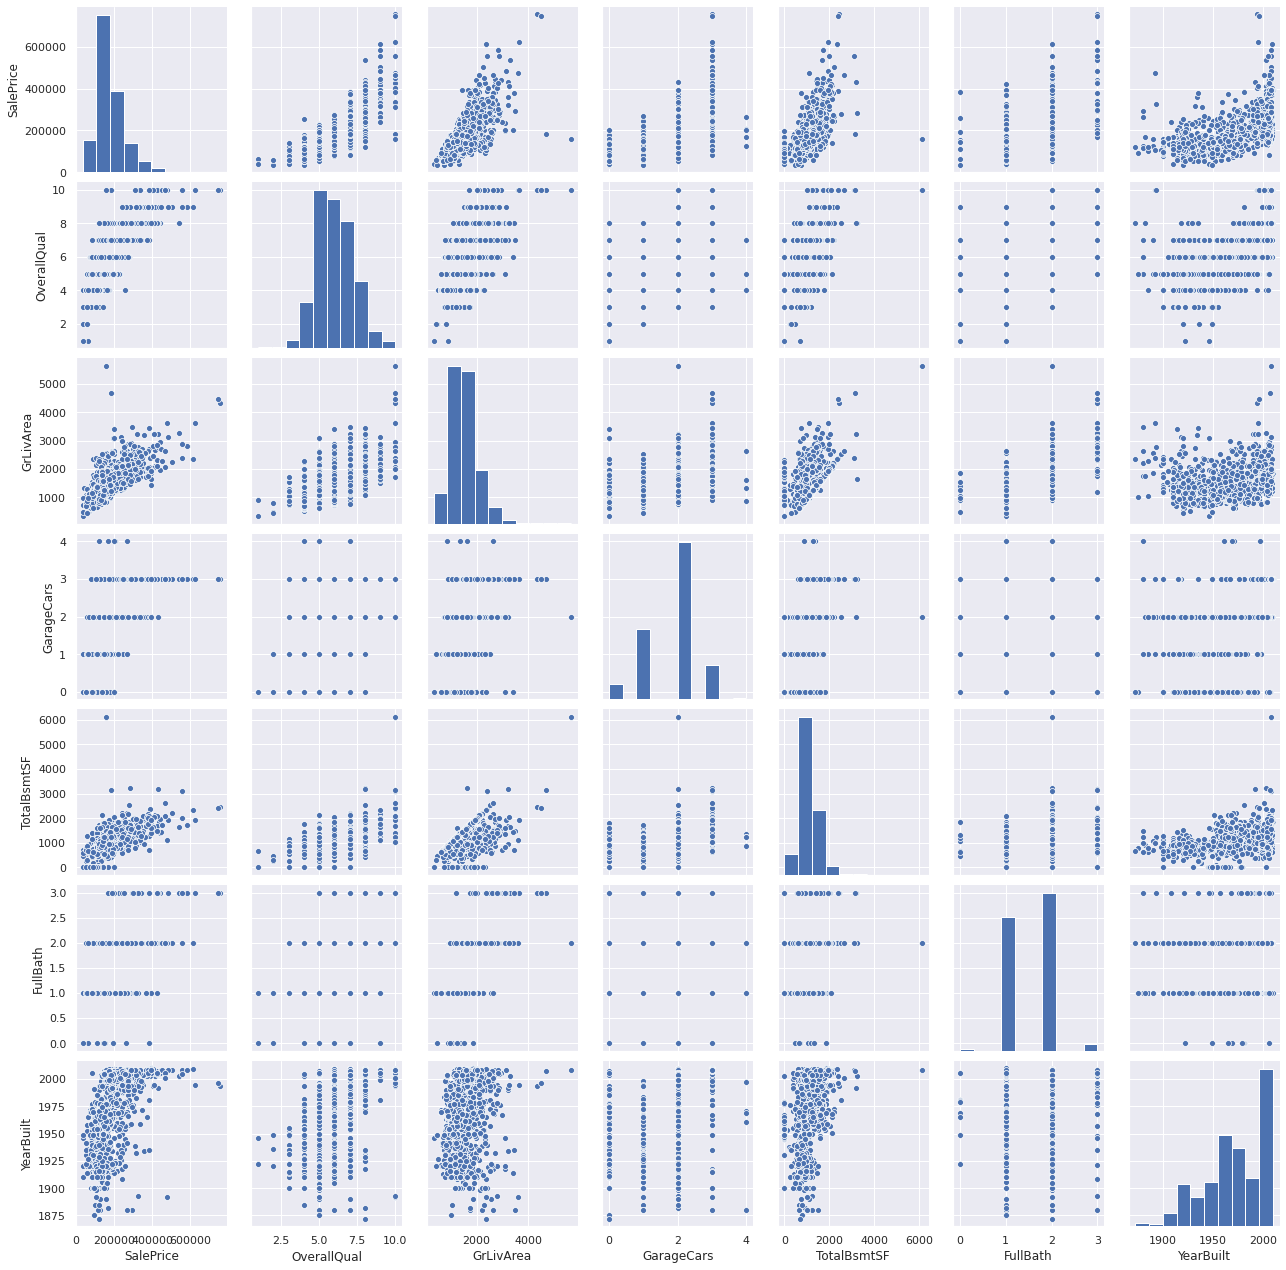

In [16]:
#More visulization
#Lets check with scatter plot

#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(trainData[cols], height = 2.5)
plt.show();

# Residual plot for Heteroscedasticity
* Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice .
*  Ideally, if this assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern.
*  The residual plot looks more like a funnel. The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. 

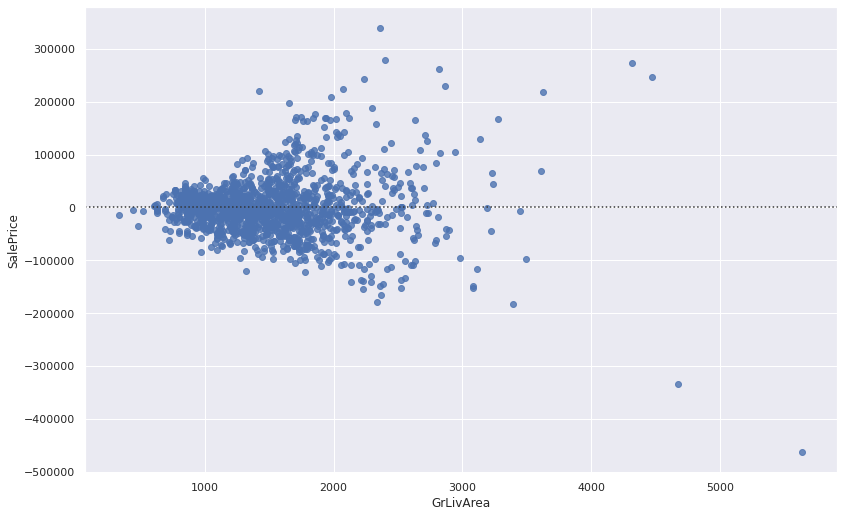

In [17]:
plt.subplots(figsize = (12,8))
sns.residplot(trainData.GrLivArea, trainData.SalePrice);

in the above scatter plot we can see that shape is funnel type that means theere is Heteroscedasticity in the data

# Multivariate Normality ( Normality of Errors)
* The linear regression analysis requires the dependent variable to be multivariate normally distributed. 
* A histogram, box plot and Q-Q-Plot can check if the target variable is normally distributed.

1. Histogram: Data should ne normalized
2. QQ diagram should be on 45 degree line for no Normal data

#**Lets Check Distribution of Sales_Price**

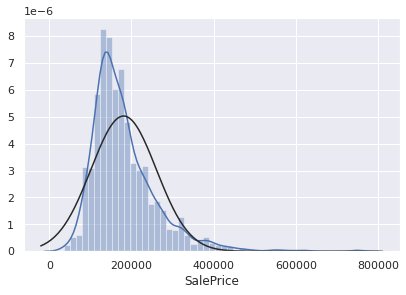

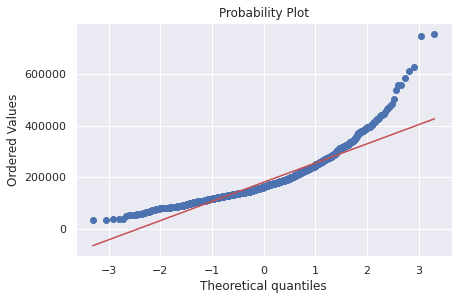

In [18]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(trainData['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(trainData['SalePrice'], plot=plt)

**The SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) tranform to fix the skew**

In [19]:
#SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line
# Lets apply log transformation

trainData['SalePrice'] = np.log(trainData['SalePrice'])

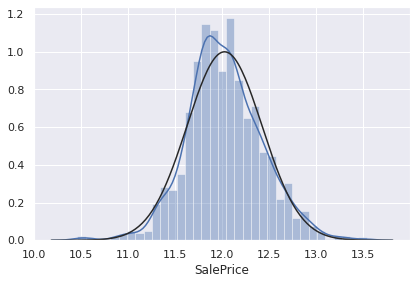

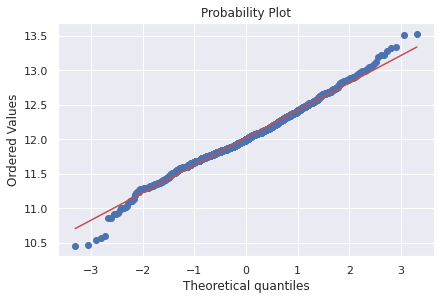

In [20]:
sns.distplot(trainData['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(trainData['SalePrice'], plot=plt)

1. Now we can see Sale Value column data is now normalzied.
1. This normalization we can apply to every column

In [21]:
trainData['GrLivArea'] = np.log(trainData['GrLivArea'])

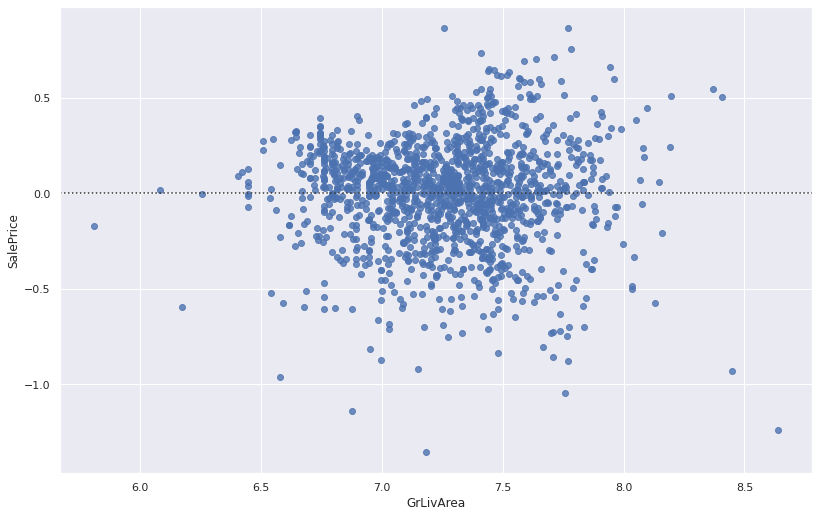

In [22]:
plt.subplots(figsize = (12,8))
sns.residplot(trainData.GrLivArea, trainData.SalePrice);

# No or Little multicollinearity:
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features.
Multicollinearity can lead to a variety of problems

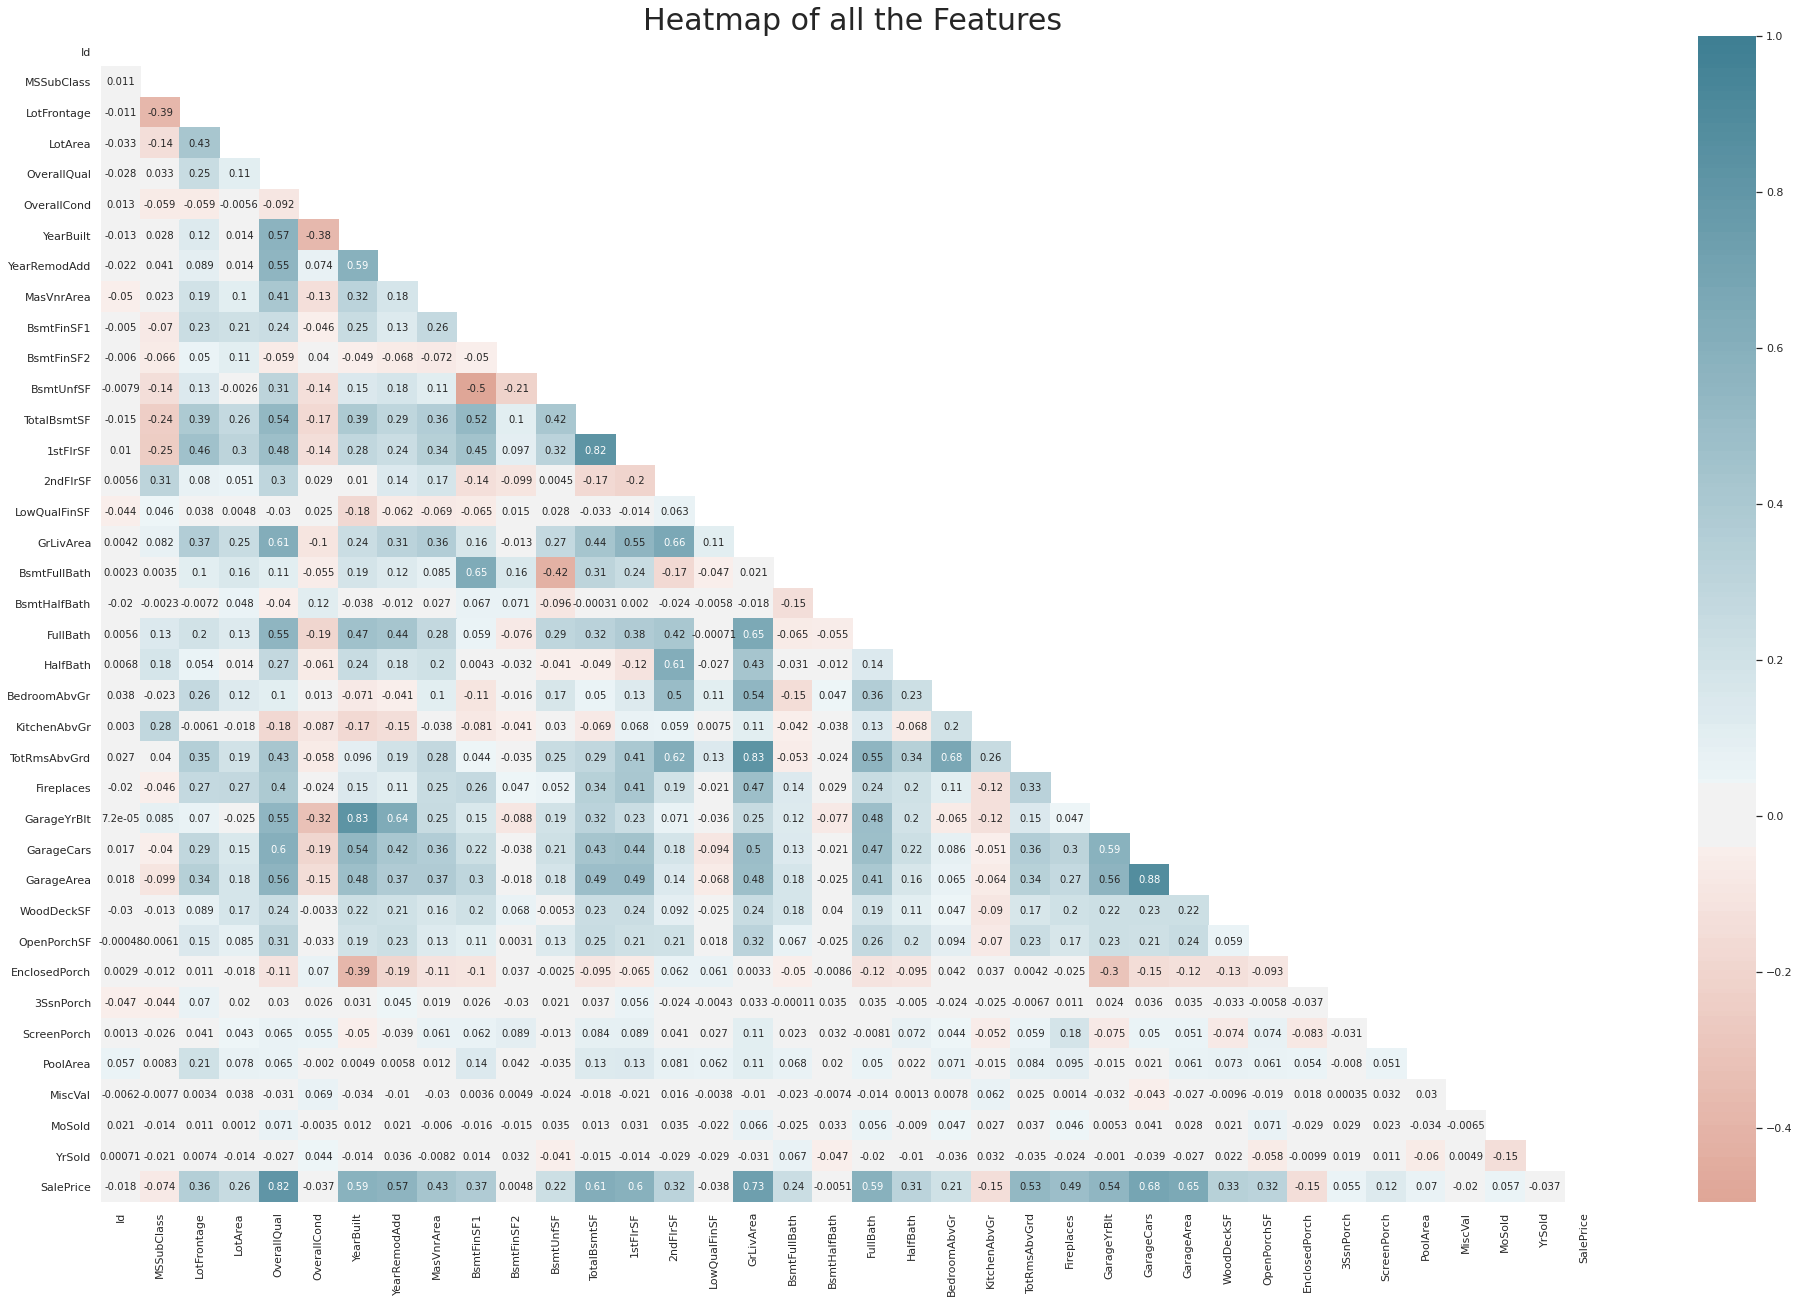

In [23]:
# Lets check CoRelation

## Plot fig sizing. 
import matplotlib.style as style
import seaborn as sns

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(trainData.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(trainData.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

* There is 0.83 or 83% correlation between GarageYrBlt and YearBuilt.
* 83% correlation between TotRmsAbvGrd and GrLivArea.
* 89% correlation between GarageCars and GarageArea.
* Similarly many other features such asBsmtUnfSF, FullBath have good correlation with other independent feature.
* 
* It also becomes clear the multicollinearity is an issue. 
* For example: the correlation between GarageCars and GarageArea is very high (0.89), and both have similar (high) correlations with SalePrice. The other 6 six variables with a correlation higher than 0.5 with SalePrice are: -TotalBsmtSF: Total square feet of basement area 
* 1stFlrSF: First Floor square feet 
* FullBath: Full bathrooms above grade 
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 
* YearBuilt: Original construction date 
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

**You have remove all the coumns which as high collinearlity one by one manually**

When you have checked all the assumptions and make your data set satisfying the linear assumptions.
You are ready to go ahead and apply your Linear Regression.

**I will be uploading another notebook soon for:**

* Feature Enginnering
* Data preprecessing
* Handling Missing Values
* Scaling of Data
* Convert Categorical to Numerical data
* Model Building
* Overfitting/Underfitting ( Bias &. variance)
* Cross Validation
* Regularization (Ridge/lasso - L1/L2)
* Prediction and Submission of Result

STAY TUNED......




# So This was very easy. is't it

I will be uploading another notebooks soon for:

* Feature Enginnering
* Data preprecessing
* Handling Missing Values
* Scaling of Data
* Convert Categorical to Numerical data
* Model Building
* Overfitting/Underfitting ( Bias &. variance)
* Cross Validation
* Regularization (Ridge/lasso - L1/L2)
* Prediction and Submission of Result
* STAY TUNED.....


if you like the notebook and it helps you to start your jounery in to machine learning.
Like and share..

Keep Learning and Keep Kaggling